<a href="https://www.kaggle.com/code/samuelgz/titanic-survival-prediction?scriptVersionId=289464820" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1. Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Load Datasets

In [8]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Training dataframe shape
print("Training data shape:", train_df.shape)

# Testing dataframe shape
print("Testing data shape:", test_df.shape)

Training data shape: (891, 12)
Testing data shape: (418, 11)


In [11]:
#Columns in train dataset
print("Columns in training dataset:", train_df.columns.tolist())

Columns in training dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## 3. Exploratory Data Analysis:

In [12]:
#Columns info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#find missing values
print("Missing values in train dataset : \n",train_df.isnull().sum())
print("\n \n")
print("Missing values in test dataset : \n", test_df.isnull().sum())

Missing values in train dataset : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 

Missing values in test dataset : 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 4. Data Visualization

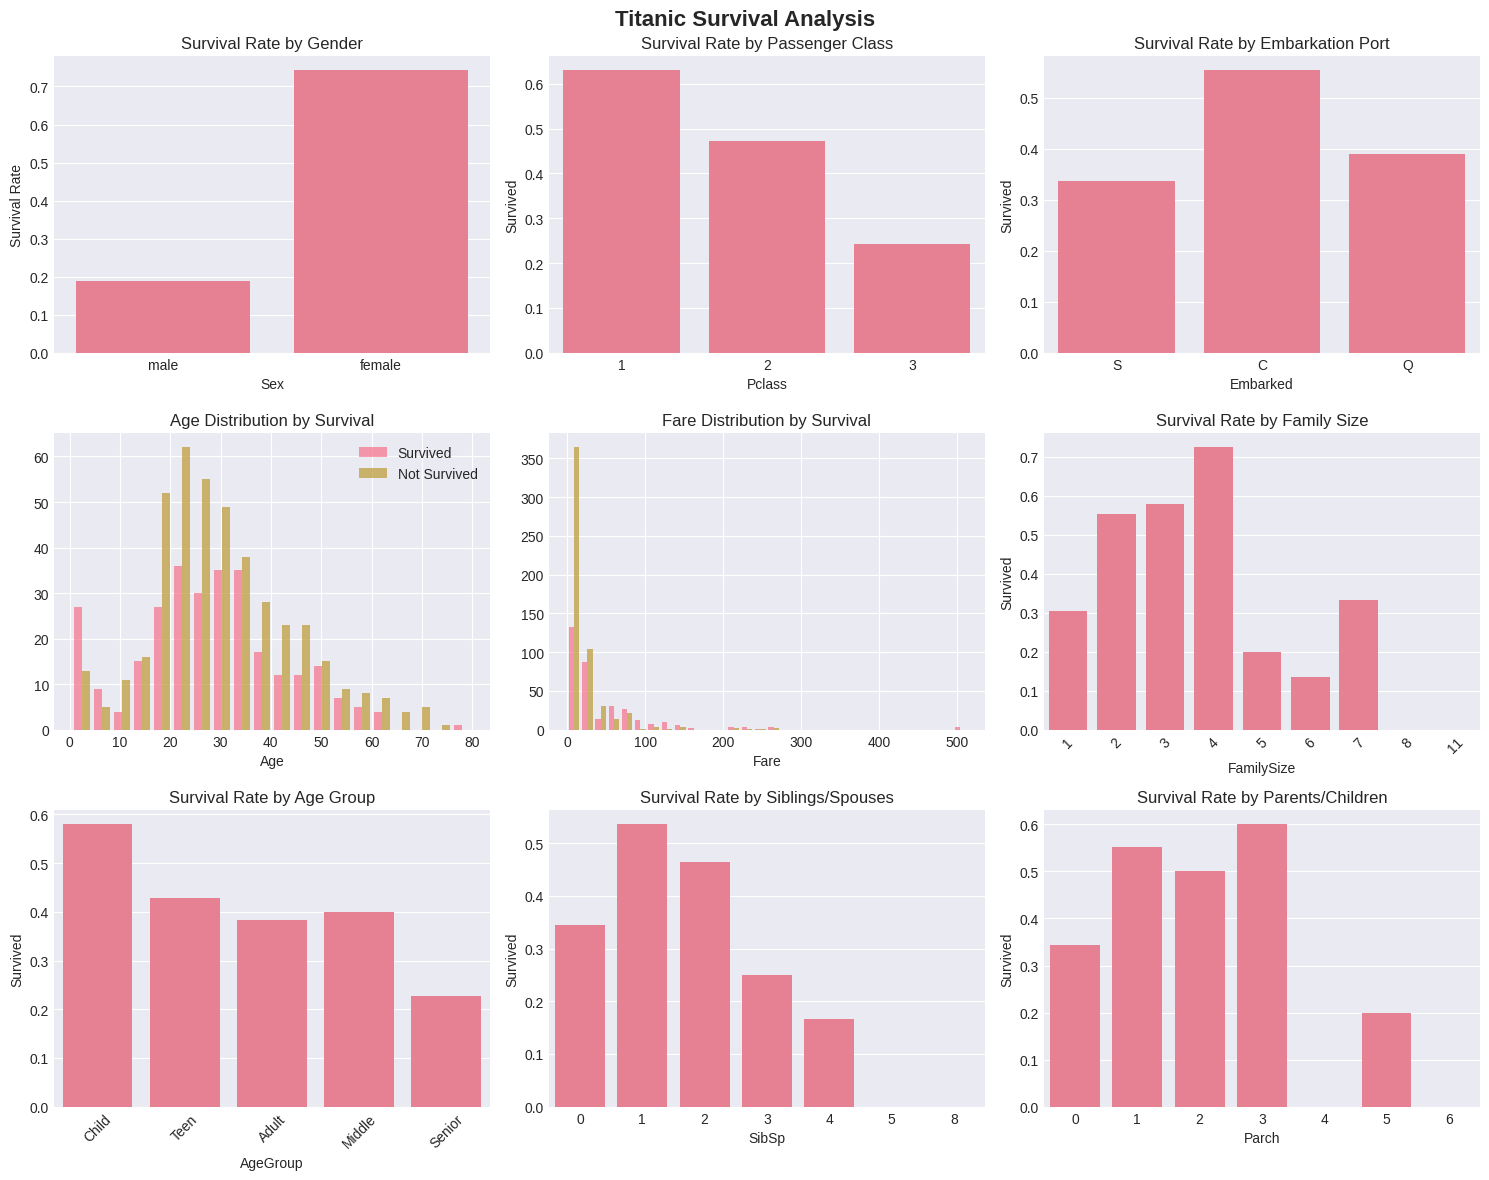

In [14]:
# Set up figure
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Titanic Survival Analysis', fontsize=16, fontweight='bold')

# 1. Survival by Gender
sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0, 0], errorbar=None)
axes[0, 0].set_title('Survival Rate by Gender')
axes[0, 0].set_ylabel('Survival Rate')

# 2. Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[0, 1], errorbar=None)
axes[0, 1].set_title('Survival Rate by Passenger Class')

# 3. Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axes[0, 2], errorbar=None)
axes[0, 2].set_title('Survival Rate by Embarkation Port')

# 4. Age Distribution by Survival
survived_age = train_df[train_df['Survived'] == 1]['Age'].dropna()
not_survived_age = train_df[train_df['Survived'] == 0]['Age'].dropna()
axes[1, 0].hist([survived_age, not_survived_age], 
                label=['Survived', 'Not Survived'], 
                bins=20, alpha=0.7)
axes[1, 0].set_title('Age Distribution by Survival')
axes[1, 0].set_xlabel('Age')
axes[1, 0].legend()

# 5. Fare Distribution by Survival
survived_fare = train_df[train_df['Survived'] == 1]['Fare'].dropna()
not_survived_fare = train_df[train_df['Survived'] == 0]['Fare'].dropna()
axes[1, 1].hist([survived_fare, not_survived_fare], 
                label=['Survived', 'Not Survived'], 
                bins=30, alpha=0.7)
axes[1, 1].set_title('Fare Distribution by Survival')
axes[1, 1].set_xlabel('Fare')

# 6. Family Size (SibSp + Parch)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train_df, ax=axes[1, 2], errorbar=None)
axes[1, 2].set_title('Survival Rate by Family Size')
axes[1, 2].tick_params(axis='x', rotation=45)

# 7. Survival by Age Groups
train_df['AgeGroup'] = pd.cut(train_df['Age'], 
                          bins=[0, 12, 18, 35, 60, 100], 
                          labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=train_df, ax=axes[2, 0], errorbar=None)
axes[2, 0].set_title('Survival Rate by Age Group')
axes[2, 0].tick_params(axis='x', rotation=45)

# 8. Survival by SibSp
sns.barplot(x='SibSp', y='Survived', data=train_df, ax=axes[2, 1], errorbar=None)
axes[2, 1].set_title('Survival Rate by Siblings/Spouses')

# 9. Survival by Parch
sns.barplot(x='Parch', y='Survived', data=train_df, ax=axes[2, 2], errorbar=None)
axes[2, 2].set_title('Survival Rate by Parents/Children')

plt.tight_layout()
plt.show()

## 5. Feature Engineering Insights

In [15]:
# INSIGHTS:

print(f"Overall survival rate: {train_df['Survived'].mean():.2%}")

print(f"\nSurvival rate by Gender:")
survival_by_gender = train_df.groupby('Sex')['Survived'].mean()
print(survival_by_gender.apply(lambda x: f"{x:.2%}"))

print(f"\nSurvival rate by Class:")
survival_by_class = train_df.groupby('Pclass')['Survived'].mean()
print(survival_by_class.apply(lambda x: f"{x:.2%}"))

print(f"\nSurvival rate by Embarked:")
survival_by_embarked = train_df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked.apply(lambda x: f"{x:.2%}"))

Overall survival rate: 38.38%

Survival rate by Gender:
Sex
female    74.20%
male      18.89%
Name: Survived, dtype: object

Survival rate by Class:
Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object

Survival rate by Embarked:
Embarked
C    55.36%
Q    38.96%
S    33.70%
Name: Survived, dtype: object


In [16]:
# Create some engineered features for analysis

train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

**As we can see here, there are too many titles and some of them mean the same thing. So title mapping needs to be done.**

In [17]:
# Group titles based on rarity and meaning
title_mapping = {
    # Common titles (keep as is)
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    
    # Professional/occupational titles
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    
    # Royalty/aristocracy
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Countess': 'Royalty',
    'Don': 'Royalty',
    'Jonkheer': 'Royalty',
    'Dona': 'Royalty',
    
    # French titles (equivalents to English titles)
    'Mme': 'Mrs',        # Madame = Mrs
    'Mlle': 'Miss',      # Mademoiselle = Miss
    'Ms': 'Miss'         # Ms = Miss
}

train_df['Title'] = train_df['Title'].map(title_mapping)

print(f"Titles counts:")
print(train_df["Title"].value_counts())
print(f"\nCommon Titles and Survival:")
print(train_df.groupby('Title')['Survived'].mean().sort_values(ascending=False))

Titles counts:
Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64

Common Titles and Survival:
Title
Mrs        0.793651
Miss       0.702703
Royalty    0.600000
Master     0.575000
Officer    0.277778
Mr         0.156673
Name: Survived, dtype: float64


## 6. Correlation Analysis

In [18]:
# Create numerical features for correlation
train_numeric = train_df.copy()
train_numeric['Sex'] = train_numeric['Sex'].map({'male': 0, 'female': 1})
train_numeric['Embarked'] = train_numeric['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
train_numeric['HasCabin'] = train_numeric['Cabin'].notna().astype(int)

# Drop the original Cabin column
train_numeric = train_numeric.drop(columns=['Cabin'])

In [19]:
train_numeric.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeGroup,Title,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,2,Adult,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.0,2,Middle,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,1,Adult,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0,2,Adult,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,1,Adult,Mr,0


In [20]:
#Select numeric columns only since correlation doesn't accepts any other data types
numeric_only = train_numeric.select_dtypes(include=['number'])

correlation = numeric_only.corr()['Survived'].sort_values(ascending=False)
print(correlation)

Survived       1.000000
Sex            0.543351
HasCabin       0.316912
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Embarked      -0.169718
Pclass        -0.338481
Name: Survived, dtype: float64


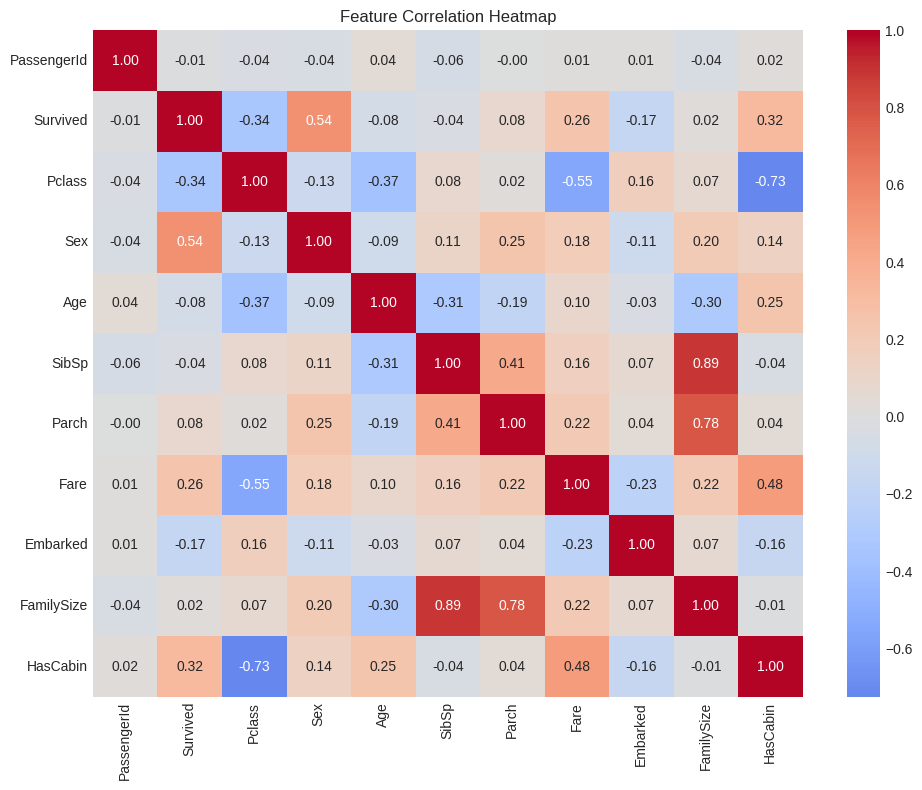

In [21]:
# Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = numeric_only.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## 7. Feature Engineering Function:

In [22]:
# Let's engineer features for the model:

# ========== 7. FEATURE ENGINEERING FUNCTION ==========
def engineer_features(df):
    df = df.copy()
    
    # Extract Title from Name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    title_mapping = {
        'Capt': 'Officer',
        'Col': 'Officer',
        'Major': 'Officer',
        'Dr': 'Officer',
        'Rev': 'Officer',
        'Jonkheer': 'Royalty',
        'Don': 'Royalty',
        'Sir': 'Royalty',
        'Lady': 'Royalty',
        'Countess': 'Royalty',
        'Dona': 'Royalty',
        'Mme': 'Mrs',
        'Ms': 'Mrs',
        'Mrs': 'Mrs',
        'Mlle': 'Miss',
        'Miss': 'Miss',
        'Mr': 'Mr',
        'Master': 'Master'
    }
    df['Title'] = df['Title'].map(title_mapping)
    
    # Family size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # Is alone
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # Age bins
    df['AgeBin'] = pd.cut(df['Age'],  #Groups ages into categories. Eg: Age=8 → AgeBin=0 (Child: 0-12), Age=25 → AgeBin=2 (Adult: 18-35)....
                          bins=[0, 12, 18, 35, 60, 100], 
                          labels=[0, 1, 2, 3, 4])
    
    # Fare bins
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])  #Divides fare into 4 quantiles. Eg: If fares are [7, 8, 10, 15, 20, 25, 30, 100] → divided into 4 groups of 2
    
    # Has cabin
    df['HasCabin'] = df['Cabin'].notna().astype(int)     #Cabin="C85" → HasCabin=1, Cabin=NaN → HasCabin=0
    
    # Deck from cabin
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna('U')    #"C85" → Deck="C", Cabin=NaN → Deck="U" (Unknown)
    
    # Ticket length (might indicate something)
    df['TicketLength'] = df['Ticket'].apply(lambda x: len(str(x))) #Ticket="A/5 21171" → Length=10.
    
    # Ticket prefix
    df['TicketPrefix'] = df['Ticket'].apply(lambda x: str(x).split()[0] if len(str(x).split()) > 1 else 'None')  #Ticket="PC 17599" → Prefix="PC", Ticket="347077" → Prefix="None"
    
    return df

# Apply feature engineering
train_eng = engineer_features(train_df)
test_eng = engineer_features(test_df)

print("Engineered features:", [col for col in train_eng.columns if col not in train_df.columns])  ## Shows which new columns were added


Engineered features: ['IsAlone', 'AgeBin', 'FareBin', 'HasCabin', 'Deck', 'TicketLength', 'TicketPrefix']


## 8. Prepare data for modelling

In [23]:
# Features to use
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'Title', 'FamilySize', 'IsAlone', 'HasCabin']

X_train = train_eng[features]
y_train = train_eng['Survived']
X_test = test_eng[features]


# Identify categorical and numerical columns
categorical_cols = ['Sex', 'Embarked', 'Title']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'HasCabin']

# Handle missing values
print("\n=== MISSING VALUES AFTER ENGINEERING ===")
print("Train:")
print(X_train.isnull().sum())
print("\nTest:")
print(X_test.isnull().sum())


=== MISSING VALUES AFTER ENGINEERING ===
Train:
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
FamilySize      0
IsAlone         0
HasCabin        0
dtype: int64

Test:
Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
FamilySize     0
IsAlone        0
HasCabin       0
dtype: int64


## 9. Create preprocessing pipeline

In [24]:
# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # This handles the missing values in Age and Fare
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),   # # This handles missing values Embarked
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

## 10. Model Training and evaluation

In [25]:
# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)


# Define models to try
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train
    pipeline.fit(X_train_split, y_train_split)
    
    # Predict
    y_pred = pipeline.predict(X_val_split)
    
    # Evaluate
    accuracy = accuracy_score(y_val_split, y_pred)
    results[name] = {
        'model': pipeline,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name}: Accuracy = {accuracy:.4f}")
    
    # Cross-validation score
    cv_scores = cross_val_score(pipeline, X_train_split, y_train_split, cv=5)
    print(f"  Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")

Random Forest: Accuracy = 0.7989
  Cross-validation: 0.7965 (+/- 0.1011)
Gradient Boosting: Accuracy = 0.8324
  Cross-validation: 0.8259 (+/- 0.0606)
Logistic Regression: Accuracy = 0.8324
  Cross-validation: 0.8160 (+/- 0.0213)
SVM: Accuracy = 0.8436
  Cross-validation: 0.8203 (+/- 0.0391)

Best model: SVM with accuracy 0.8436


## 11. Final Model Training

In [26]:
# Train final SVM model on ALL training data with default parameters
final_svm_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C=1.0,
        gamma='scale',
        kernel='rbf',
        class_weight=None,
        probability=True,
        random_state=42
    ))
])

final_svm_model.fit(X_train, y_train)

print(f"✓ Final SVM model trained on all {len(X_train)} training samples")
print(f"✓ Using default parameters: C=1.0, gamma='scale', kernel='rbf', class_weight=None")

# Quick validation check
y_train_pred = final_svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"✓ Training accuracy: {train_accuracy:.4f}")


✓ Final SVM model trained on all 891 training samples
✓ Using default parameters: C=1.0, gamma='scale', kernel='rbf', class_weight=None
✓ Training accuracy: 0.8406


## 12. Feature Analysis

Total features after preprocessing: 19
Calculating permutation importance...

Top 10 Most Important Features:
         Feature  Importance
2          SibSp    0.022110
5     FamilySize    0.011672
0         Pclass    0.010101
1            Age    0.009203
3          Parch    0.008866
4           Fare    0.004826
7       HasCabin    0.002357
10    Embarked_C    0.001908
13  Title_Master    0.001908
6        IsAlone    0.001347


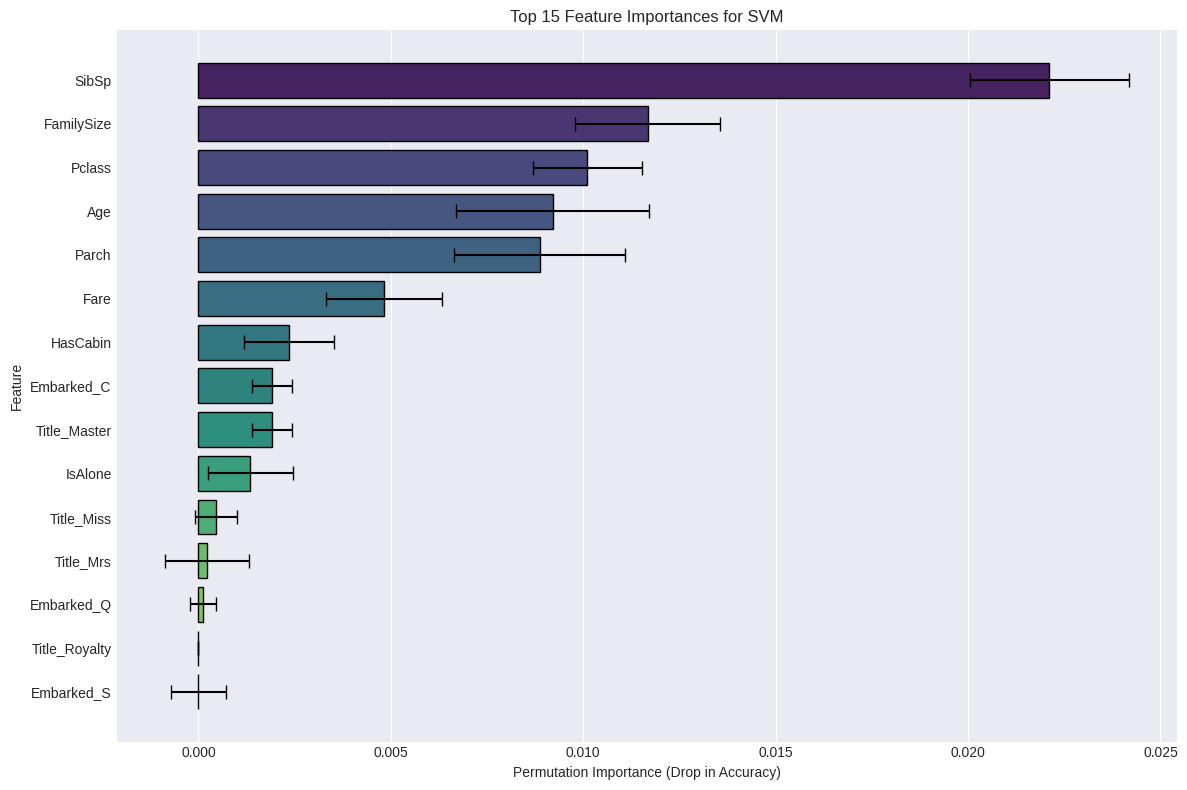

In [27]:
# Get feature names
preprocessor = final_svm_model.named_steps['preprocessor']
feature_names = []
feature_names.extend(numerical_cols)

# Get categorical feature names
onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot.get_feature_names_out(categorical_cols)
feature_names.extend(cat_feature_names)

print(f"Total features after preprocessing: {len(feature_names)}")

# Calculate permutation importance
from sklearn.inspection import permutation_importance

print("Calculating permutation importance...")
X_train_transformed = preprocessor.transform(X_train)
svm_classifier = final_svm_model.named_steps['classifier']

result = permutation_importance(
    svm_classifier,
    X_train_transformed,
    y_train,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create importance dataframe
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(perm_importance_df[['Feature', 'Importance']].head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = perm_importance_df.head(15)
sns.barplot(x='Importance', y='Feature', data=top_features, 
            palette='viridis', edgecolor='black')
plt.errorbar(x=top_features['Importance'], y=top_features['Feature'],
             xerr=top_features['Std'], fmt='none', c='black', capsize=5)
plt.xlabel('Permutation Importance (Drop in Accuracy)')
plt.title('Top 15 Feature Importances for SVM')
plt.tight_layout()
plt.show()

## 13. Make predictions:

In [28]:
# Make predictions
test_predictions = final_svm_model.predict(X_test)

# Get prediction probabilities
test_probabilities = final_svm_model.predict_proba(X_test)[:, 1]

print(f"✓ Made predictions for {len(X_test)} test passengers")

✓ Made predictions for 418 test passengers


## 14. Create Submission file

In [29]:
# Create submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("✓ Submission file saved as 'submission.csv'")

# Create detailed version with probabilities
submission_detailed = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions,
    'Probability_Survived': test_probabilities,
    'Confidence': np.maximum(test_probabilities, 1 - test_probabilities)
})

submission_detailed.to_csv('submission_detailed.csv', index=False)
print("✓ Detailed predictions saved as 'submission_detailed.csv'")

✓ Submission file saved as 'submission.csv'
✓ Detailed predictions saved as 'submission_detailed.csv'


## 15. Prediction Analysis

In [30]:
print(f"\nPrediction Summary:")
print(f"Total test passengers: {len(submission)}")
print(f"Predicted survivors: {submission['Survived'].sum()} ({submission['Survived'].mean():.2%})")
print(f"Predicted non-survivors: {(submission['Survived'] == 0).sum()} ({1 - submission['Survived'].mean():.2%})")

# Confidence analysis
print(f"\nConfidence Analysis:")
confidences = submission_detailed['Confidence']
print(f"Average confidence: {confidences.mean():.2%}")
print(f"Low confidence (< 60%): {(confidences < 0.6).sum()}")
print(f"High confidence (> 80%): {(confidences > 0.8).sum()}")


Prediction Summary:
Total test passengers: 418
Predicted survivors: 160 (38.28%)
Predicted non-survivors: 258 (61.72%)

Confidence Analysis:
Average confidence: 82.54%
Low confidence (< 60%): 10
High confidence (> 80%): 335


## 16. Visualize Predictions

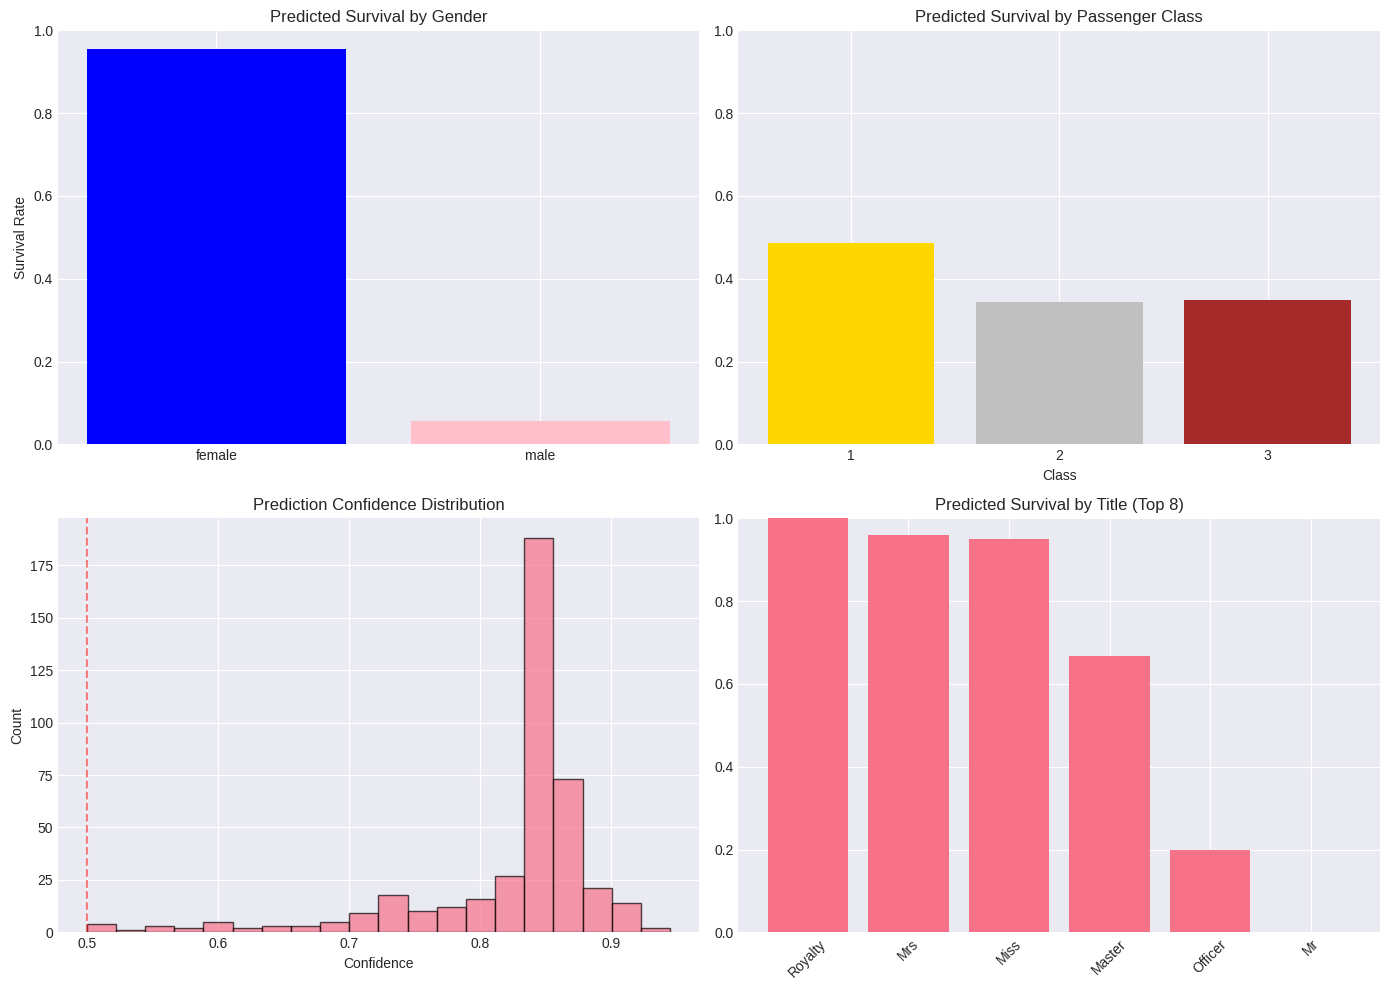

In [31]:
# Add predictions to test data for analysis
test_with_pred = test_eng.copy()
test_with_pred['PredictedSurvived'] = test_predictions

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Survival by Gender
gender_survival = test_with_pred.groupby('Sex')['PredictedSurvived'].mean()
axes[0, 0].bar(gender_survival.index, gender_survival.values, color=['blue', 'pink'])
axes[0, 0].set_title('Predicted Survival by Gender')
axes[0, 0].set_ylabel('Survival Rate')
axes[0, 0].set_ylim(0, 1)

# 2. Survival by Class
class_survival = test_with_pred.groupby('Pclass')['PredictedSurvived'].mean()
axes[0, 1].bar(class_survival.index.astype(str), class_survival.values, color=['gold', 'silver', 'brown'])
axes[0, 1].set_title('Predicted Survival by Passenger Class')
axes[0, 1].set_xlabel('Class')
axes[0, 1].set_ylim(0, 1)

# 3. Confidence distribution
axes[1, 0].hist(submission_detailed['Confidence'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Prediction Confidence Distribution')
axes[1, 0].set_xlabel('Confidence')
axes[1, 0].set_ylabel('Count')
axes[1, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)

# 4. Survival by Title
title_survival = test_with_pred.groupby('Title')['PredictedSurvived'].mean().sort_values(ascending=False)
axes[1, 1].bar(range(len(title_survival.head(8))), title_survival.head(8).values)
axes[1, 1].set_title('Predicted Survival by Title (Top 8)')
axes[1, 1].set_xticks(range(len(title_survival.head(8))))
axes[1, 1].set_xticklabels(title_survival.head(8).index, rotation=45)
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


## 17. Final Summary:

In [33]:
print("FINAL SUMMARY")
print("="*60)
print(f"Model: Support Vector Machine (SVM)")
print(f"Kernel: RBF (Radial Basis Function)")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy (from earlier): 0.8436")
print(f"\nPredictions:")
print(f"  - Survivors: {submission['Survived'].sum()} ({submission['Survived'].mean():.2%})")
print(f"  - Non-survivors: {(submission['Survived'] == 0).sum()} ({1 - submission['Survived'].mean():.2%})")
print(f"\nFiles created:")
print(f"  1. submission.csv - Main submission for Kaggle")
print(f"  2. submission_detailed.csv - Detailed predictions with probabilities")


FINAL SUMMARY
Model: Support Vector Machine (SVM)
Kernel: RBF (Radial Basis Function)
Training samples: 891
Test samples: 418
Training accuracy: 0.8406
Validation accuracy (from earlier): 0.8436

Predictions:
  - Survivors: 160 (38.28%)
  - Non-survivors: 258 (61.72%)

Files created:
  1. submission.csv - Main submission for Kaggle
  2. submission_detailed.csv - Detailed predictions with probabilities
